Step 0. Importing libraries...

In [1]:
import sqlite3
import csv
import pandas as pd

Step 1. Creating a database and merging two tables


I'll be working with two tables that I have created and worked with during my practicum. 

The first table contains the information about the participants I gathered. The table consists of five columns which include the participants' IDs, their age, gender, and level of education. Note that there are two columns created for their level of education: the category (e.g. university degree, secondary vocational, etc) and its corresponding group. So, for 'incomplete secondary vocational' it would be group 1, for 'secondary vocational' it's group 2, for 'incomplete university degree' it's 3, for 'university degree' it's 4, and finally for 'phd' it's 5.
Also, we used 0 and 1 for genders, where 0 corresponds to 'male' and 1 corresponds to 'female'. 

The second table contains the answers that my participants have provided for one task from the experiment. The task was to explain the meaning of an utterance that uses a metaphor, a comparison, or a proverb, and was aimed to check whether the participant understands the pragmatic meaning of the said utterance. This table consists of five columns, as well: those are participants' IDs, the code name of the task ('figurative 2'), the task items (1-15), the participants' score (0-2, where 0 is literal interpretation/rephrasing of the utterance/wrong answer/NA, 1 is partially correct (e.g. the participant uses a concrete example to illustrate their understanding of an utterance but fails to provide a general interpretation), and 2 is correct), and the participants' answers in Russian.

I've decided to combine these two tables in a single database using the pd.merge() function.
First I'll recreate these two tables, and then I'll merge them into one dataframe. 

In [2]:
# table 1
df1 = pd.read_csv(r'C:\Users\Kaz\Documents\preprocessing python\hw2\p_info.csv', sep=',')

In [3]:
# let's check if everything works fine
df1.head()

,Id,Age,Gender,EducGroup,EducGroupCat
0,101-APACSadd,21,1,4,university degree
1,102-APACSadd,37,0,5,phd
2,103-APACSadd,21,0,4,university degree
3,104-APACSadd,50,1,4,university degree
4,105-APACSadd,53,0,4,university degree


In [4]:
# table 2
df2 = pd.read_csv(r'C:\Users\Kaz\Documents\preprocessing python\hw2\p_task.csv', sep=',', encoding = "utf-8")

In [5]:
df2.head()

,Id,Task,Item,Score,Answer
0,101-APACSadd,figurative 2,1,2,не придал значение
1,101-APACSadd,figurative 2,2,2,нет денег
2,101-APACSadd,figurative 2,3,2,рассеянный
3,101-APACSadd,figurative 2,4,2,счастлив
4,101-APACSadd,figurative 2,5,2,пожалеет


In [6]:
# merging the tables into one
# I'll be using a one-to-one join since I think it's important for the database to contain each answer separately.
df = pd.merge(df1, df2)

In [7]:
df

,Id,Age,Gender,EducGroup,EducGroupCat,Task,Item,Score,Answer
0,101-APACSadd,21,1,4,university degree,figurative 2,1,2,не придал значение
1,101-APACSadd,21,1,4,university degree,figurative 2,2,2,нет денег
2,101-APACSadd,21,1,4,university degree,figurative 2,3,2,рассеянный
3,101-APACSadd,21,1,4,university degree,figurative 2,4,2,счастлив
4,101-APACSadd,21,1,4,university degree,figurative 2,5,2,пожалеет
...,...,...,...,...,...,...,...,...,...
355,124-APACSadd,73,1,4,university degree,figurative 2,11,2,вас могут всегда услышать
356,124-APACSadd,73,1,4,university degree,figurative 2,12,2,"у любого человека иногда не бывает того, что о..."
357,124-APACSadd,73,1,4,university degree,figurative 2,13,2,что компания одного опоздавшего не ждет
358,124-APACSadd,73,1,4,university degree,figurative 2,14,2,"если на тебя свалилась одна беда, жди другую"


Alright, it seems that everything is working well so far. Now let's make a database out of this table and create a cursor for it.

In [15]:
conn = sqlite3.connect("pdata.db")
cur=conn.cursor()
df.to_sql(name='pdata', con=con, if_exists='replace')

In [16]:
for row in cur.execute('SELECT * FROM pdata'):
    print(row)

(0, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 1, 2, 'не придал значение')
(1, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 2, 2, 'нет денег')
(2, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 3, 2, 'рассеянный')
(3, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 4, 2, 'счастлив')
(4, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 5, 2, 'пожалеет')
(5, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 6, 2, 'очень тяжелые')
(6, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 7, 2, 'причиняют боль, болезненные')
(7, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 8, 0, 'не слышала')
(8, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 9, 2, 'очень красивые')
(9, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 10, 1, 'не расчешешь')
(10, '101-APACSadd', 21, 1, 4, 'university degree', 'figurative 2', 11, 2, 'вас везде могут подслуша

In [17]:
con.commit()

Step 2. Queries

Now that we have this database, let's make six different queries to it.

In [19]:
# Querie 1. Let's see the best answers that the participant 103-APACSadd made during this task.

for i in con.execute("SELECT * FROM pdata WHERE Id='103-APACSadd' AND Score='2'"):
    print(i)

(30, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 1, 2, 'не стал обращать внимание на то, как она себя ведет')
(31, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 2, 2, 'у него нет денег')
(32, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 3, 2, 'отвлекается все время')
(33, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 4, 2, 'очень счастлив')
(34, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 5, 2, 'будет недовольна')
(35, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 6, 2, 'тяжелые сумки')
(36, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 7, 2, 'их сложно забыть')
(37, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 8, 2, 'очень громкие голоса')
(38, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 9, 2, 'очень красивые манекенщицы')
(39, '103-APACSadd', 21, 0, 4, 'university degree', 'figurative 2', 10, 2, 'очень густые прически')
(40, 

In [20]:
# Querie 2. Let's organize our participants' scores for the 12th utterance from the highest score to the lowest.
# Also, let's restrict the output to their ID's and ages.
# (Oh, by the way, the utterance in question here is "Сапожник без сапог").

for i in con.execute("SELECT Id, Age, Item, Score, Answer FROM pdata WHERE Item='12' ORDER BY Score DESC"):
    print(i)

('101-APACSadd', 21, 12, 2, 'обслуживает всех кроме себя')
('102-APACSadd', 37, 12, 2, 'человек, который занимается конкретным делом, не может применить это дело к себе')
('104-APACSadd', 50, 12, 2, 'чужим что-то делает, а у самого нету')
('105-APACSadd', 53, 12, 2, 'профессионал часто оказывается не в состоянии помочь самому себе')
('107-APACSadd', 37, 12, 2, 'человек, который обладает каким-то знанием, но не применяет в своей жизни по каким-то обстоятельствам')
('109-APACSadd', 34, 12, 2, 'человек, который что-то умеет делать, но этого у него нет')
('110-APACSadd', 32, 12, 2, 'человек что-то делает, но сам себя этим обеспечить не может')
('113-APACSadd', 54, 12, 2, 'человек в профессии и не имеет того, чем занимается')
('118-APACSadd', 38, 12, 2, 'сам чем-то человек занимается, а самого этого у человека нет')
('124-APACSadd', 73, 12, 2, 'у любого человека иногда не бывает того, что он производит')
('116-APACSadd', 28, 12, 1, 'бедный, о всех заботится кроме себя, сам чинит всем сапоги

In [21]:
# Querie 3. Let's see what are 106-APACSadd's last 5 answers and scores.

for i in con.execute("SELECT Id, Item, Score, Answer FROM pdata WHERE Id = '106-APACSadd' LIMIT 5 OFFSET 10"):
    print(i)

('106-APACSadd', 11, 2, 'слышат все, подслушивают')
('106-APACSadd', 12, 0, 'не умеет делать что-то, как правило, свою работу')
('106-APACSadd', 13, 2, 'много людей не ждет одного')
('106-APACSadd', 14, 2, 'если что-то случилось, как правило будет несколько неприятностей')
('106-APACSadd', 15, 2, 'все хорошо, но что-то малое портит впечатление')


In [22]:
# Querie 4. Let's see what 102-APACSadd's total score is.

for i in con.execute('SELECT Id, SUM(Score) AS Total_score FROM pdata WHERE Id="102-APACSadd"'):
    print(i)

('102-APACSadd', 29)


In [23]:
# Querie 5. Let's find the average score for each item.

for i in con.execute('SELECT Item, AVG(Score) AS Total_score FROM pdata GROUP BY Item'):
    print(i)

(1, 1.75)
(2, 1.9166666666666667)
(3, 1.875)
(4, 2.0)
(5, 1.75)
(6, 2.0)
(7, 1.9166666666666667)
(8, 1.6666666666666667)
(9, 1.8333333333333333)
(10, 1.7916666666666667)
(11, 1.7916666666666667)
(12, 1.0)
(13, 1.875)
(14, 1.9166666666666667)
(15, 1.8333333333333333)


In [24]:
# Querie 6. (I think I'm running out of ideas).
# Let's order these averages from the lowest score to the highest, 
# to see which item proved to be the most difficult to comprehend and explain.

for i in con.execute('SELECT Item, AVG(Score) AS Total_score FROM pdata GROUP BY Item ORDER BY AVG(Score) ASC'):
    print(i)

(12, 1.0)
(8, 1.6666666666666667)
(1, 1.75)
(5, 1.75)
(10, 1.7916666666666667)
(11, 1.7916666666666667)
(9, 1.8333333333333333)
(15, 1.8333333333333333)
(3, 1.875)
(13, 1.875)
(2, 1.9166666666666667)
(7, 1.9166666666666667)
(14, 1.9166666666666667)
(4, 2.0)
(6, 2.0)


Step 3. Visualization

Here I must admit that I have created only three plots out of four, two of them being barplots (so in all honesty what I did is made two kinds of plots instead of four), either because there is not much to be visualized in my data, especially in the 'db2' table, or I just lack imagination. 

In [26]:
# importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

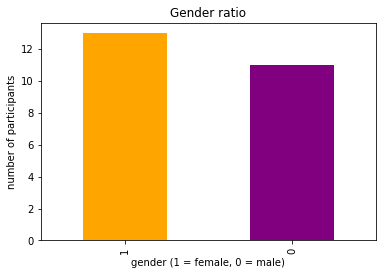

In [32]:
# Plot 1. Let's see the gender ratio of our participants.
# For this barplot I'll be using the first table, because there are no duplicate rows.

df1['Gender'].value_counts().plot.bar(color=['orange','purple']); # yay halloween!
plt.title('Gender ratio')
plt.xlabel('gender (1 = female, 0 = male)')
plt.ylabel('number of participants');

Text(0, 0.5, 'age')

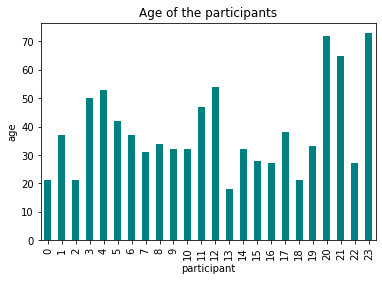

In [33]:
# Plot 2. Let's visualize the ages of the participants.
# Ideally, I wanted it to show me the ages in an ascending order,
# but I didn't figure out how to do it, and, besides,
# maybe it's not that necessary in this case.

df1['Age'].plot(kind="bar", color="teal");
plt.title('Age of the participants')
plt.xlabel('participant')
plt.ylabel('age')

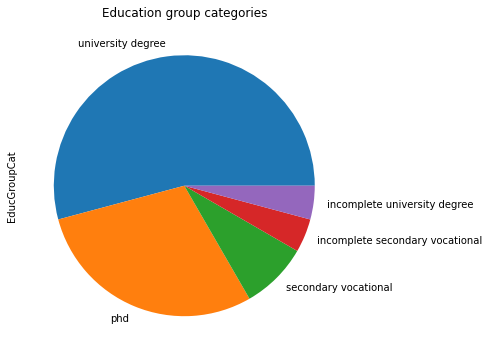

In [34]:
# Plot 3. Let's create a pie chart. It will show us the level of education ratio -- or, in other words,
# how many participants belong to this or that education group.

plt.figure(figsize=(6, 6))
df1['EducGroupCat'].value_counts().plot(kind='pie');
plt.title('Education group categories');

In [31]:
con.close()

Step 4. Final project

Unfortunately, I haven't really figured out what I want to do for my final project. Is it possible to send you an e-mail sometime later (maybe in a week or so)?